In [23]:
import os
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
if not Path("img").exists():
    Path("img").mkdir()
    print("Created img directory")

# Strong and Weak Scaling

In [25]:
strong_scaling_df = pd.read_csv('csv/strong_scaling.csv')
weak_scaling_df = pd.read_csv('csv/weak_scaling.csv')

In [26]:
strong_scaling_df['Average wct'] = strong_scaling_df.drop(columns=['p']).mean(axis=1)
weak_scaling_df['Average wct'] = weak_scaling_df.drop(columns=['p']).mean(axis=1)

In [27]:
strong_scaling_df['speedup'] = strong_scaling_df['Average wct'][0] / strong_scaling_df['Average wct']

In [28]:
strong_scaling_df.head()

,p,t1,t2,t3,t4,t5,Average wct,speedup
0,1,14.577458,14.579865,14.120483,14.187404,14.124182,14.317878,1.000000
1,2,7.074718,7.074051,7.275541,7.062362,7.087446,7.114824,2.012401
2,3,4.725943,4.897290,4.929485,4.875601,4.723709,4.830406,2.964115
3,4,3.591323,3.602253,3.579329,3.623316,3.581115,3.595467,3.982202
4,5,2.866968,2.883959,2.897076,2.888014,2.965398,2.900283,4.936718


In [29]:
strong_scaling_df['efficiency'] = strong_scaling_df['speedup'] / strong_scaling_df['p']

weak_scaling_df['efficiency'] = weak_scaling_df['Average wct'][0] / weak_scaling_df['Average wct']

In [30]:
strong_scaling_df.head(8)

,p,t1,t2,t3,t4,t5,Average wct,speedup,efficiency
0,1,14.577458,14.579865,14.120483,14.187404,14.124182,14.317878,1.000000,1.000000
1,2,7.074718,7.074051,7.275541,7.062362,7.087446,7.114824,2.012401,1.006201
2,3,4.725943,4.897290,4.929485,4.875601,4.723709,4.830406,2.964115,0.988038
3,4,3.591323,3.602253,3.579329,3.623316,3.581115,3.595467,3.982202,0.995551
4,5,2.866968,2.883959,2.897076,2.888014,2.965398,2.900283,4.936718,0.987344
5,6,2.465045,2.470053,2.398793,2.408600,2.401518,2.428802,5.895038,0.982506
6,7,2.072323,2.074299,2.093236,2.070725,2.064011,2.074919,6.900452,0.985779
7,8,1.803928,1.859035,1.808324,1.862206,1.822619,1.831222,7.818755,0.977344


In [31]:
weak_scaling_df.head()

,p,t1,t2,t3,t4,t5,Average wct,efficiency
0,1,14.136683,14.259000,14.349611,14.626159,14.176346,14.309560,1.000000
1,2,15.124973,15.166168,14.483825,15.078520,14.567558,14.884209,0.961392
2,3,14.730957,14.639158,15.896477,14.356410,14.343660,14.793332,0.967298
3,4,14.343412,14.255921,14.264952,14.350499,14.274318,14.297820,1.000821
4,5,14.688457,14.348223,14.835277,14.788949,15.881297,14.908441,0.959829


Plot the speedup with the theoretical linear speedup as a reference.

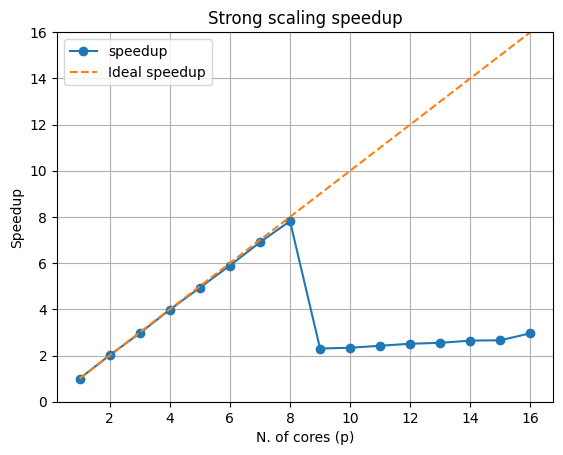

In [32]:
strong_scaling_df.plot(x='p', y='speedup', title='Strong scaling speedup', marker='o', ylim=(0, max(strong_scaling_df['p'])))
plt.plot(strong_scaling_df['p'], strong_scaling_df['p'], label='Ideal speedup', linestyle='--')
plt.xlabel('N. of cores (p)')
plt.ylabel('Speedup')
plt.legend()
plt.grid()
plt.savefig(f'img{os.sep}strong_scaling_speedup.svg', format='svg')
plt.show()

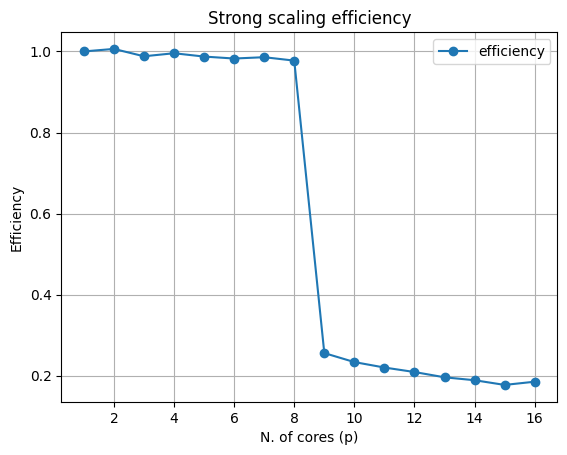

In [33]:
strong_scaling_df.plot(x='p', y='efficiency', title='Strong scaling efficiency', marker='o')
plt.xlabel('N. of cores (p)')
plt.ylabel('Efficiency')
plt.legend()
plt.grid()
plt.savefig(f'img{os.sep}strong_scaling_efficiency.svg', format='svg')
plt.show()

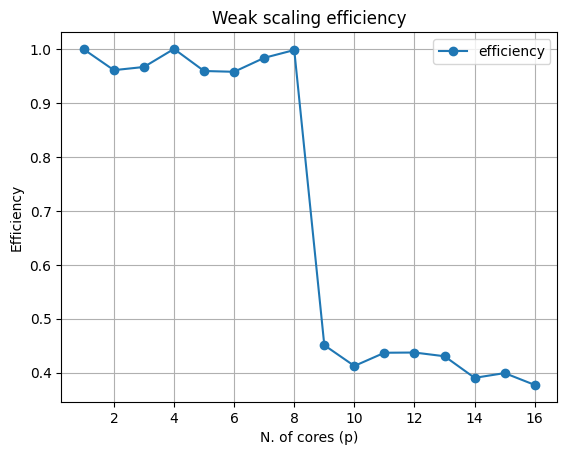

In [34]:
weak_scaling_df.plot(x='p', y='efficiency', title='Weak scaling efficiency', marker='o')
plt.xlabel('N. of cores (p)')
plt.ylabel('Efficiency')
plt.legend()
plt.grid()
plt.savefig(f'img{os.sep}weak_scaling_efficiency.svg', format='svg')
plt.show()

# CUDA Throughput

In [35]:
cuda_df = pd.read_csv('csv/cuda_perf.csv')

In [36]:
cuda_df.head()

,N,K,cpu_t1,cpu_t2,cpu_t3,cpu_t4,cpu_t5,gpu_t1,gpu_t2,gpu_t3,...,gpu_th1,gpu_th2,gpu_th3,gpu_th4,gpu_th5,gpu_th1_shared,gpu_th2_shared,gpu_th3_shared,gpu_th4_shared,gpu_th5_shared
0,65536,1000,0.145523,0.127258,0.142978,0.130755,0.123910,0.010080,0.011054,0.009427,...,6.501642e+06,5.928686e+06,6.952276e+06,6.902675e+06,7.248985e+06,3.153623e+07,2.760444e+07,3.258076e+07,3.179635e+07,3.440127e+07
1,131072,1000,0.244806,0.242389,0.247572,0.238748,0.255250,0.009950,0.009993,0.011281,...,1.317319e+07,1.311602e+07,1.161906e+07,1.344527e+07,1.317171e+07,4.740792e+07,4.719975e+07,4.179120e+07,4.756908e+07,4.724595e+07
2,262144,1000,0.479008,0.470932,0.488710,0.492386,0.477828,0.010721,0.012595,0.010878,...,2.445147e+07,2.081300e+07,2.409907e+07,2.470006e+07,2.483322e+07,6.537903e+07,5.660237e+07,6.263789e+07,6.435869e+07,6.424237e+07
3,524288,1000,0.952188,0.968082,0.954229,0.944171,0.923645,0.012979,0.011659,0.011879,...,4.039455e+07,4.496681e+07,4.413453e+07,4.389878e+07,4.434268e+07,7.310353e+07,8.246896e+07,8.310415e+07,8.159523e+07,8.216430e+07
4,1048576,1000,1.881055,1.911216,1.918760,1.905904,1.827417,0.014220,0.013827,0.014068,...,7.373820e+07,7.583281e+07,7.453466e+07,7.342492e+07,7.416274e+07,9.911294e+07,9.897506e+07,9.917651e+07,9.711398e+07,9.936182e+07


In [37]:
cuda_df['CPU Average wct'] = cuda_df[['cpu_t1','cpu_t2','cpu_t3','cpu_t4','cpu_t5']].mean(axis=1)
cuda_df['GPU Average wct'] = cuda_df[['gpu_t1','gpu_t2','gpu_t3','gpu_t4','gpu_t5']].mean(axis=1)
cuda_df['GPU Average wct shared'] = cuda_df[['gpu_t1_shared','gpu_t2_shared','gpu_t3_shared','gpu_t4_shared','gpu_t5_shared']].mean(axis=1)

cuda_df['CPU Average throughput'] = cuda_df[['cpu_th1','cpu_th2','cpu_th3','cpu_th4','cpu_th5']].mean(axis=1) / 1000000
cuda_df['GPU Average throughput'] = cuda_df[['gpu_th1','gpu_th2','gpu_th3','gpu_th4','gpu_th5']].mean(axis=1) / 1000000
cuda_df['GPU Average throughput shared'] = cuda_df[['gpu_th1_shared','gpu_th2_shared','gpu_th3_shared','gpu_th4_shared','gpu_th5_shared']].mean(axis=1) / 1000000

cuda_df['Speedup'] = cuda_df['CPU Average wct'] / cuda_df['GPU Average wct']
cuda_df['Speedup shared'] = cuda_df['CPU Average wct'] / cuda_df['GPU Average wct shared']

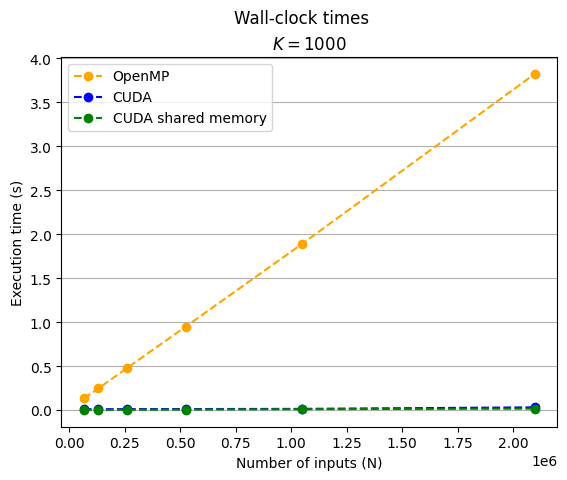

In [38]:
plt.plot(cuda_df['N'], cuda_df['CPU Average wct'], label='OpenMP', marker='o', linestyle='--', color='orange')
plt.plot(cuda_df['N'], cuda_df['GPU Average wct'], label='CUDA', marker='o', linestyle='--', color='blue')
plt.plot(cuda_df['N'], cuda_df['GPU Average wct shared'], label='CUDA shared memory', marker='o', linestyle='--', color='green')
plt.suptitle('Wall-clock times')
plt.title(rf'$K = {cuda_df["K"].iloc[0]}$')
plt.xlabel('Number of inputs (N)')
plt.ylabel('Execution time (s)')
plt.legend()
plt.grid(axis='y')
plt.savefig(f'img{os.sep}cuda_wct.svg', format='svg')
plt.show()

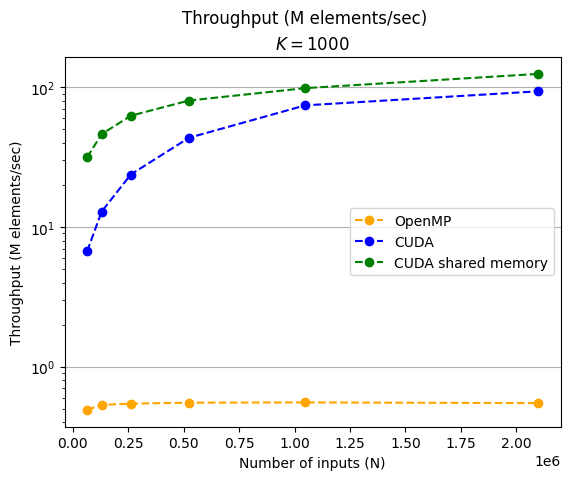

In [39]:
plt.plot(cuda_df['N'], cuda_df['CPU Average throughput'], label='OpenMP', marker='o', linestyle='--', color='orange')
plt.plot(cuda_df['N'], cuda_df['GPU Average throughput'], label='CUDA', marker='o', linestyle='--', color='blue')
plt.plot(cuda_df['N'], cuda_df['GPU Average throughput shared'], label='CUDA shared memory', marker='o', linestyle='--', color='green')
plt.suptitle('Throughput (M elements/sec)')
plt.title(rf'$K = {cuda_df["K"].iloc[0]}$')
plt.xlabel('Number of inputs (N)')
plt.ylabel('Throughput (M elements/sec)')
plt.yscale('log', base=10)
plt.legend()
plt.grid(axis='y')
plt.savefig(f'img{os.sep}cuda_throughput.svg', format='svg')
plt.show()

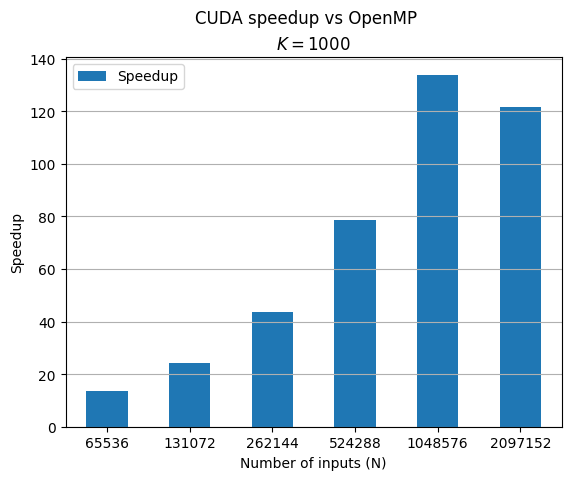

In [40]:
cuda_df.plot.bar(x='N', y='Speedup')
plt.suptitle('CUDA speedup vs OpenMP')
plt.title(rf'$K = {cuda_df["K"].iloc[0]}$')
plt.xlabel('Number of inputs (N)')
plt.xticks(rotation=0)
plt.ylabel('Speedup')
plt.grid(axis='y')
plt.savefig(f'img{os.sep}cuda_speedup.svg', format='svg')
plt.show()

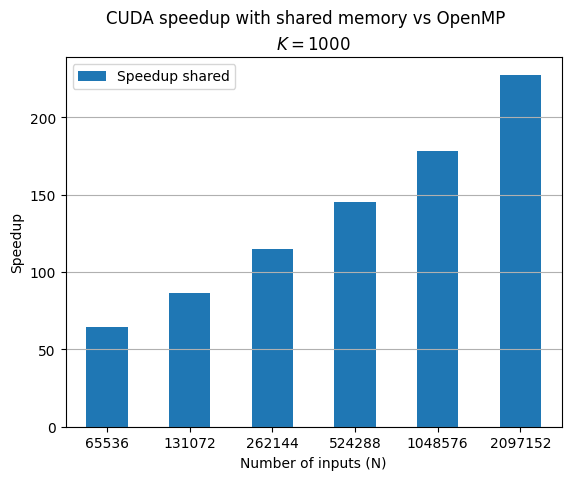

In [41]:
cuda_df.plot.bar(x='N', y='Speedup shared')
plt.suptitle('CUDA speedup with shared memory vs OpenMP')
plt.title(rf'$K = {cuda_df["K"].iloc[0]}$')
plt.xlabel('Number of inputs (N)')
plt.xticks(rotation=0)
plt.ylabel('Speedup')
plt.grid(axis='y')
plt.savefig(f'img{os.sep}cuda_speedup_shared.svg', format='svg')
plt.show()

In [42]:
print(f"Speedup of CUDA for N = 1048576: {cuda_df[cuda_df['N'] == 1048576]['Speedup'].values[0]:.2f}")
print(f"Speedup of CUDA with shared memory for N = 1048576: {cuda_df[cuda_df['N'] == 1048576]['Speedup shared'].values[0]:.2f}")

Speedup of CUDA for N = 1048576: 133.90
Speedup of CUDA with shared memory for N = 1048576: 177.87
